In [3]:
import pandas as pd
import numpy as np
import sklearn.tree
import sklearn.metrics
import sklearn.model_selection
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import Image

pd.set_option('display.max_columns', None)

# Loading and Examining our Data

Our data for this example includes a separate [training set](https://drive.google.com/file/d/17751St2254pgTDQHPb3vYvD2S45c1KCn/view?usp=sharing) and [test set](https://drive.google.com/file/d/1I6F1fLg6H5Mxu0t5KM1W3NnhmkAKHETs/view?usp=sharing).
The CSV files are huge (60 columns!). Let's take a look at them.

In [4]:
df_train = pd.read_csv('https://drive.google.com/uc?export=download&id=17751St2254pgTDQHPb3vYvD2S45c1KCn')
df_test = pd.read_csv('https://drive.google.com/uc?export=download&id=1I6F1fLg6H5Mxu0t5KM1W3NnhmkAKHETs')
df_train.head()

ID  Decision     Build_Selfcon  Selfcon_Code  Tier  Tier_1  \
0  AJM-39R8-519413         0  Self Contruction             1     3       0   
1  AJM-3A3Z-876970         0  Self Contruction             1     3       0   
2  AJM-7427-952085         1  Self Contruction             1     3       0   
3  AJM-8ZTZ-979040         1  Self Contruction             1     3       0   
4  AJM-9SP2-614810         1  Self Contruction             1     3       0   

   Tier_2 Accommodation_Class  AccoClass         Loan_Type  LoanType  Gender  \
0       0          Non_Rented          0         Home_Loan         1  Female   
1       0          Non_Rented          0         Home_Loan         1  Female   
2       0          Non_Rented          0  Home_Improvement         0  Female   
3       0              Rented          1         Home_Loan         1  Female   
4       0          Non_Rented          0         Home_Loan         1  Female   

   Sex Employment_Type  Etype Doc_Proof_Inc  Doc_pf Marital_Status  Marstat  \
0    0   Self_Employed      1             N       0        Married        1   
1    0        Salaried      0             Y       1        Married        1   
2    0   Self_Employed      1             Y       1        Married        1   
3    0   Self_Employed      1             Y       1        Married        1   
4    0   Self_Employed      1             Y       1        Married        1   

  Employer_Type  Emp_Type_1  Emp_Type_2  Emp_Type_3 Education_Class  \
0      Business           1           0           0       GRADUATE+   
1  Ind/SmallBus           0           0           0             U10   
2  Ind/SmallBus           0           0           0             U10   
3      Business           1           0           0       GRADUATE+   
4      Business           1           0           0             U10   

   Educlass_2  Educlass_1 Mode_of_origin_class  Oriclass_1  Oriclass_2  \
0           1           0            Reference           1           0   
1           0           0            Reference           1           0   
2           0           0            Reference           1           0   
3           1           0            Reference           1           0   
4           0           0            Reference           1           0   

   eom_25  OldEmi_d  BankSave_d  Age  YrsAdd  YrsJob  Expen  TotInc  DispInc  \
0       0         1           0   31      25       4  13934   51090    37156   
1       1         1           0   41       2      15   9758   22386    12628   
2       0         0           0   51       9       8  11620   32536    20916   
3       0         0           0   26       2       6  12557   41595    29038   
4       0         0           0   31      30      15  10537   37537    27000   

    MarVal  OldEmi  LoanReq  Term  Dwnpay  BankSave       CalcEmi        IIR  \
0   500000    7306   200000    84  300000         0   4087.159912   7.999922   
1   450704    2431   320000   180  130000         0   4924.810059  21.999509   
2  2777778       0   500000    84  557000         0  11712.969730  36.000030   
3  1785714       0  1000000   180  666500         0  15390.040040  36.999736   
4  1960784       0  1000000   180  151000         0  15390.040040  40.999654   

         IAR       FOIR        LTV   LVR  dwnp_prop    mfoir_p  dwnp_prop_p  \
0  11.000000  22.300176  40.000000  40.0   0.600000  30.663042    60.000000   
1  38.999129  32.858975  71.000035  71.0   0.288889  58.250000    28.888889   
2  56.000047  36.000030  17.999999  47.0   0.526963  56.000047    52.696310   
3  52.999656  36.999736  56.000009  60.0   0.399940  52.999656    39.993999   
4  57.000148  40.999654  51.000008  87.0   0.131190  57.000148    13.119027   

   DispInc_s  MarVal_s  LoanReq_s  LoanReq_s.1  CalcEmi_s  OldEmi_s  \
0     3.7156  0.500000        2.0          0.0   0.408716    0.7306   
1     1.2628  0.450704        3.2          0.0   0.492481    0.2431   
2     2.0916  2.777778        5.0          0.0   1.171297    0.0000  

In [5]:
df_train.describe()

Decision  Selfcon_Code         Tier       Tier_1       Tier_2  \
count  1570.000000   1570.000000  1570.000000  1570.000000  1570.000000   
mean      0.799363      0.962420     1.996815     0.315287     0.372611   
std       0.400605      0.190238     0.792325     0.464778     0.483654   
min       0.000000      0.000000     1.000000     0.000000     0.000000   
25%       1.000000      1.000000     1.000000     0.000000     0.000000   
50%       1.000000      1.000000     2.000000     0.000000     0.000000   
75%       1.000000      1.000000     3.000000     1.000000     1.000000   
max       1.000000      1.000000     3.000000     1.000000     1.000000   

         AccoClass     LoanType          Sex        Etype       Doc_pf  \
count  1570.000000  1570.000000  1570.000000  1570.000000  1570.000000   
mean      0.490446     0.932484     0.087898     0.536943     0.272611   
std       0.500068     0.250993     0.283237     0.498792     0.445445   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     0.000000     0.000000   
50%       0.000000     1.000000     0.000000     1.000000     0.000000   
75%       1.000000     1.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Marstat   Emp_Type_1   Emp_Type_2   Emp_Type_3   Educlass_2  \
count  1570.000000  1570.000000  1570.000000  1570.000000  1570.000000   
mean      0.901911     0.508917     0.081529     0.184076     0.227389   
std       0.297530     0.500080     0.273732     0.387670     0.419279   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     1.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        Educlass_1   Oriclass_1   Oriclass_2       eom_25     OldEmi_d  \
count  1570.000000  1570.000000  1570.000000  1570.000000  1570.000000   
mean      0.169427     0.794904     0.093631     0.228662     0.129936   
std       0.375248     0.403900     0.291407     0.420105     0.336340   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     0.000000     0.000000   
50%       0.000000     1.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        BankSave_d          Age       YrsAdd       YrsJob         Expen  \
count  1570.000000  1570.000000  1570.000000  1570.000000   1570.000000   
mean      0.119745    37.755414     9.840764    10.929299  11830.994268   
std       0.324767     8.410670    10.481894     7.986092   7124.936274   
min       0.000000    22.000000     0.000000     0.000000   1148.000000   
25%       0.000000    31.000000     2.000000     4.000000   7668.250000   
50%       0.000000    37.000000     5.000000    10.000000  10151.500000   
75%       0.000000    43.000000    15.000000    15.000000  13678.250000   
max       1.000000    63.000000    61.000000    60.000000  71820.000000   

              TotInc        DispInc        MarVal        OldEmi  \
count    1570.000000    1570.000000  1.570000e+03   1570.000000   
mean    29773.247134   17942.252229  1.177865e+06    770.103185   
std     18064.471699   14477.212531  6.553948e+05   3101.888861   
min      7000.000000    2684.000000  5.996000e+04      0.000000   
25%     18773.250000    9867.500000  7.897618e+05      0.000000   
50%     25127.000000   14630.000000  1.072752e+06      0.000000   
75%     35237.500000   21218.250000  1.403509e+06      0.000000   
max    219858.000000  192376.000000  7.272727e+06  40000.000000   

              LoanReq         Term        Dwnpay     

## Target and feature columns

In this example, we will be predicting the target ``Decision`` based on all of the other columns (the features).

In [9]:
target = 'Decision'

Let's list the features that we'll use in the variable ``features``.

Note that many of the columns are categorical data, which has already been turned into numerical data. For example, ``Tier`` is a number from 1 through 3. This is split into dummy variables ``Tier_1`` and ``Tier_2`` already for us. Let's use the indicator variables in ``features``.

In [10]:
features = [
    'Selfcon_Code',
    'Tier_1',
    'Tier_2',
    'AccoClass',
    'LoanType',
    'Sex',
    'Etype',
    'Doc_pf',
    'Marstat',
    'Emp_Type_1',
    'Emp_Type_2',
    'Emp_Type_3',
    'Educlass_2',
    'Educlass_1',
    'Oriclass_1',
    'Oriclass_2',
    'eom_25',
    'OldEmi_d',
    'BankSave_d',
    'Age',
    'YrsAdd',
    'YrsJob',
    'Expen',
    'TotInc',
    'DispInc',
    'MarVal',
    'OldEmi',
    'LoanReq',
    'Term',
    'Dwnpay',
    'BankSave',
    'CalcEmi',
    'IIR',
    'IAR',
    'FOIR',
    'LTV',
    'LVR',
    'dwnp_prop',
    'mfoir_p',
    'dwnp_prop_p',
    'DispInc_s',
    'MarVal_s',
    'LoanReq_s',
    'LoanReq_s.1',
    'CalcEmi_s',
    'OldEmi_s',
    'Tier2XAccoClass']

# Our First ``DecisionTreeClassifier``

In this section we'll build a decision tree to predict ``target`` from ``features``. We will be using the [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class for this.

## Creating the decision tree

First let's build a tree using the default settings. Let ``dt`` be our decision tree.

In [11]:
dt = sklearn.tree.DecisionTreeClassifier(random_state=7)
dt.fit(df_train[features], df_train[target])

DecisionTreeClassifier(random_state=7)

## Visualizing the tree

And now let's visualize the tree that we just made. First, let's define a function to help display our tree. This function will return a [``graphviz.Graph``](https://graphviz.readthedocs.io/en/stable/api.html#graph) object that we can display directly.

In [12]:
def GetDecisionTreeGraphViz(dt):
  return graphviz.Source(sklearn.tree.export_graphviz(
      dt, out_file=None, filled=True, impurity=False,
      feature_names=features,
      class_names=['Not Sanctioned', 'Sanctioned']))

Let's call that function on ``dt``, the decision tree that we just fit to ``df_train``.

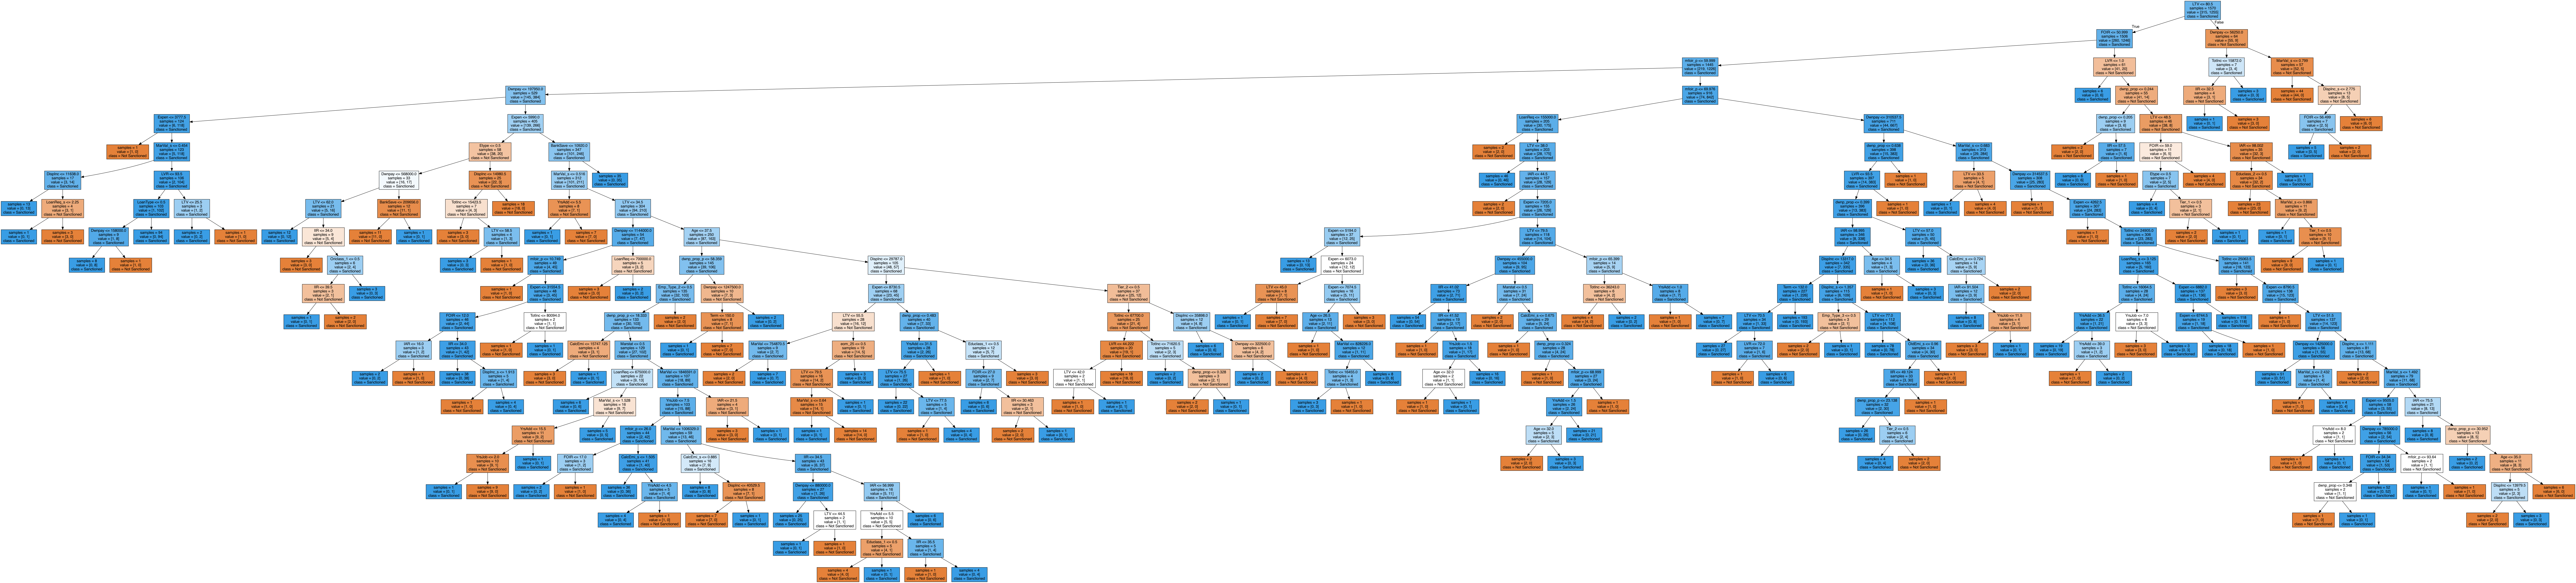

In [13]:
# The default visualization
#display(GetDecisionTreeGraphViz(dt))

# The zoomed-out visualization
display(Image(GetDecisionTreeGraphViz(dt).pipe(format='png'), width=1024))

What suspicions might we have about our fit, given this visualization?

## CART Regression Feature Importance

Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.


<Figure size 864x288 with 0 Axes>

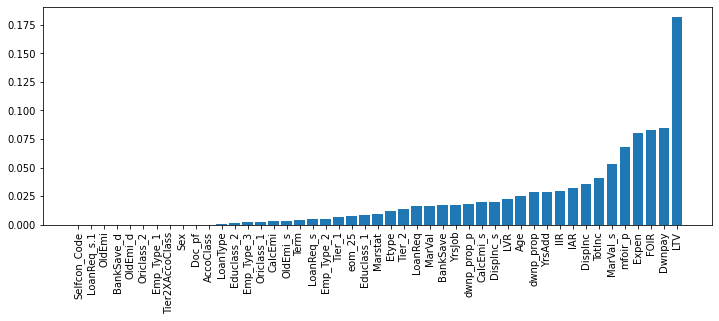

In [15]:
plt.figure(figsize=[12, 4])
I = np.argsort(dt.feature_importances_)
plt.figure(figsize=[12, 4])
plt.bar([features[i] for i in I], [dt.feature_importances_[i] for i in I])
plt.xticks(rotation=90)
plt.show()

## Evaluating our tree's performance using ``score``

Let's compute this tree's predictions for ``df_train`` and ``df_test``. We can use the [``DecisionTreeClassifier.predict``](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) function to do this.


In [16]:
predicted_train = dt.predict(df_train[features])
predicted_test = dt.predict(df_test[features])

Let's compare our predictions to the actual value of ``Decision``. We can find what percent of the predictions were correct by computing the ``np.mean`` of ``predicted_train`` compared to ``df_train[target]``. Let's look at our results for the training set.

In [17]:
np.mean(predicted_train == df_train[target])

1.0

What do we feel about this accuracy? Especially in light of the shape of the decision tree? Let's examine the test set.

In [18]:
np.mean(predicted_test == df_test[target])

0.7886676875957122

Note that we can also get the accuracy using the function [``DecisionTreeClassifier.score``](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score) function.

In [19]:
dt.score(df_test[features], df_test[target])

0.7886676875957122

## Evaluating our tree using a confusion matrix

Let's compute the confusion matrix for the test data.

In [20]:
cm_train = sklearn.metrics.confusion_matrix(df_train[target], predicted_train)
cm_train

array([[ 315,    0],
       [   0, 1255]])

In [21]:
cm_test = sklearn.metrics.confusion_matrix(df_test[target], predicted_test)
cm_test

array([[ 59,  57],
       [ 81, 456]])

It can be hard to remember what each cell in this matrix represents, so let's define a function to draw a prettier confusion matrix.

In [22]:
def DrawConfusionMatrix(confusion_matrix):
  # Taken from https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
  class_names = ['Not Sanctioned', 'Sanctioned']
  df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
  fig = plt.figure(figsize=(4, 3))
  heatmap = sns.heatmap(df_cm, annot=True, fmt='d')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), ha='center')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.title('Confusion Matrix')
  plt.show()

Let's draw this for our training data.

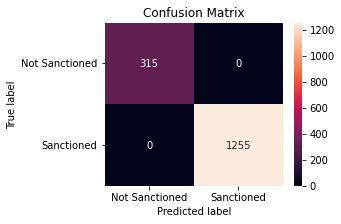

In [23]:
cm_train = sklearn.metrics.confusion_matrix(df_train[target], predicted_train)
DrawConfusionMatrix(cm_train)

And also for our test data.

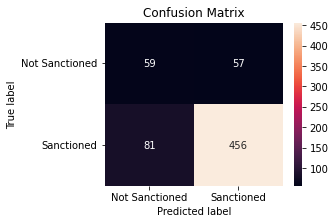

In [24]:
DrawConfusionMatrix(cm_test)

## Sensitivity and specificity

We can also compute the specificity and sensitivity from the confusion matrix. Let's create a function to do that

In [25]:
def SensitivityAndSpecificity(cm):
  # True positives are in the lower-right (row 1, column 1)
  TP = cm[1, 1]
  # True negatives are in the upper-left (row 0, column 0)
  TN = cm[0, 0]
  # False positives are in the upper-right (row 0, columns 1)
  FP = cm[0, 1]
  # False negatives are in the lower-left (row 1, column 0)
  FN = cm[1, 0]
  sensitivity = TP / (TP + FN)
  specificity = TN / (TN + FP)
  return {'Sensitivity': sensitivity, 'Specificity': specificity}

And run it on our confusion matrices.

In [26]:
SensitivityAndSpecificity(cm_train)

{'Sensitivity': 1.0, 'Specificity': 1.0}

In [27]:
SensitivityAndSpecificity(cm_test)

{'Sensitivity': 0.8491620111731844, 'Specificity': 0.5086206896551724}

# Tuning our hyperparameters

That wasn't the best decision tree we could have made. Why was that? What hyperparameters to decision trees have that could be tuned to avoid the problem? And what's the tool in our toolbox to find the best hyperparameter?



## Adjusting tree depth

The function [``DecisionTreeClassifier``](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) has a parameter ``max_depth`` which allows us to control the maximum depth of the decision tree.

Let's see that parameter in action.

## Tree of depth 1

This is a tree of depth 1. There is just one decision made for the whole tree. What is that decision? What are the outcomes?

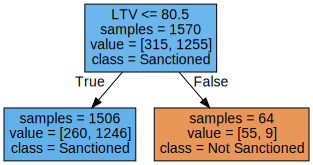

In [28]:
# Here we specify a maximum depth of 1
dt = sklearn.tree.DecisionTreeClassifier(max_depth=1, random_state=7)
dt.fit(df_train[features], df_train[target])
display(GetDecisionTreeGraphViz(dt))

Let's look at one of the sample data points. How would this tree classify that data point? Would it be correct?

In [29]:
df_test.loc[0, ['ID', 'Decision', 'LTV']]

ID          AJM-6Y07-874556
Decision                  1
LTV               34.000004
Name: 0, dtype: object

## Tree of depth 3

Let's create a bigger tree (and we'll use the alternative visualization function to keep its size smaller).

How does this tree related to the initial tree? What pruning could we do to this tree to make it less redundant?

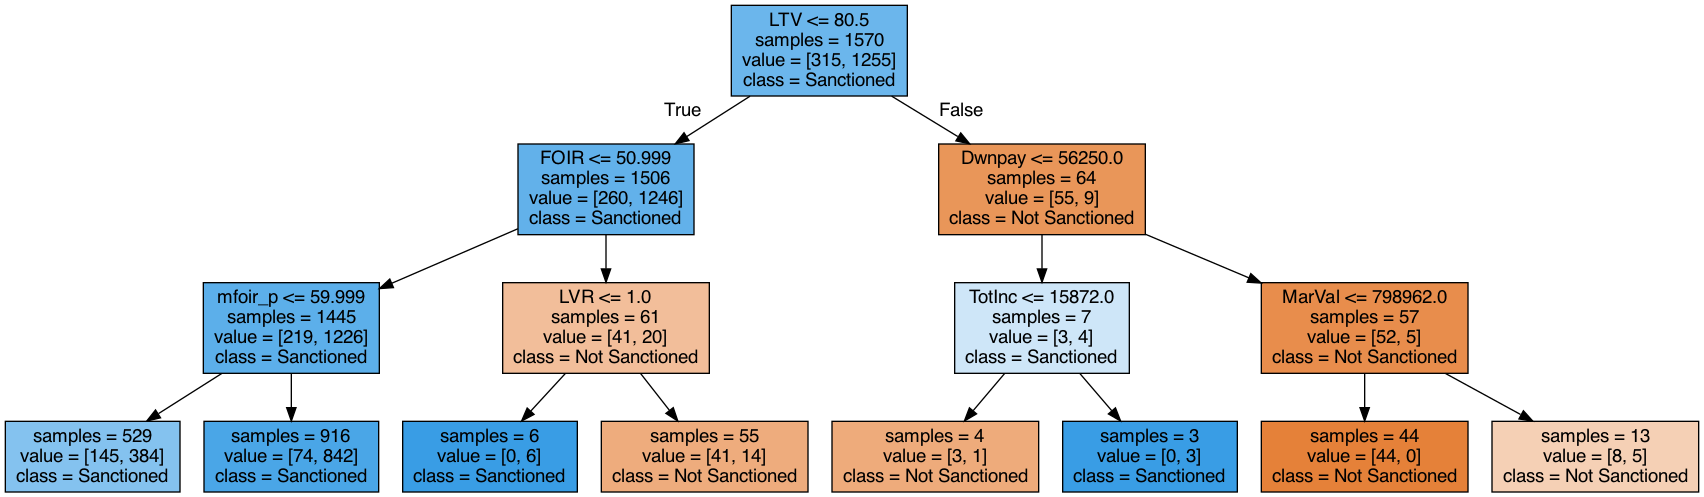

In [30]:
# Here we specify a maximum depth of 3
dt = sklearn.tree.DecisionTreeClassifier(max_depth=3, random_state=7)
dt.fit(df_train[features], df_train[target])
display(Image(GetDecisionTreeGraphViz(dt).pipe(format='png'), width=960))

Let's try another data point. Would it be sanctioned according to this model? Does the model match the actual decision?

In [31]:
df_test.loc[5, ['ID', 'Decision', 'LTV', 'FOIR', 'LVR', 'Dwnpay', 'TotInc', 'MarVal', 'mfoir_p']]

ID          AMR-VZ86-531159
Decision                  0
LTV                    75.0
FOIR              14.999758
LVR                    75.0
Dwnpay              1350000
TotInc                24853
MarVal               200000
mfoir_p            21.99994
Name: 5, dtype: object

## Running cross-validation to find the lowest error rate

Let's use the same cross-validation function we used in our overfitting notebook to see what the best depth parameter would be.

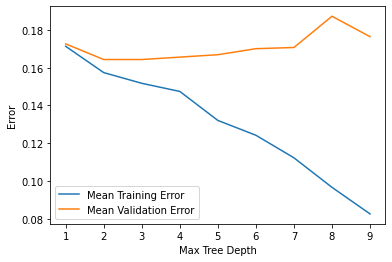

In [32]:
# We'll test the depths 1, 2, ..., 9.
max_depths = np.arange(1, 10)
n_max_depths = len(max_depths)

# And we'll be doing 10-fold cross-validation.
n_folds = 10

# We'll be doing a fit for each of the n_max_depths depths, for each of teh
# n_folds folds. Allocate space for the results of each of these results.
train_errors = np.zeros([n_max_depths, n_folds])
valid_errors = np.zeros([n_max_depths, n_folds])

# We'll use fold_index to keep track of which fold we're on, so we know which
# entry to save it in.
fold_index = 0

# Iterate over every training/validation split
kf_xval = sklearn.model_selection.KFold(
    n_splits=n_folds, shuffle=True, random_state=7)
for fold_train_index, fold_valid_index in kf_xval.split(df_train[features]):
  # Get the fold's training and validation data from the indices.
  fold_train = df_train.loc[fold_train_index]
  fold_valid = df_train.loc[fold_valid_index]

  # Iterate over every value in max_depths
  for max_depth_index in range(n_max_depths):
    dt = sklearn.tree.DecisionTreeClassifier(
        max_depth=max_depths[max_depth_index], random_state=7)
    dt.fit(fold_train[features], fold_train[target])

    # Compute the error for the training and validation folds as 1 minus the
    # score.
    train_errors[max_depth_index, fold_index] = \
        1 - dt.score(fold_train[features], fold_train[target])
    valid_errors[max_depth_index, fold_index] = \
        1 - dt.score(fold_valid[features], fold_valid[target])

  # Increment the index for the fold we're on.
  fold_index += 1

# Now let's get the mean training and validation error across all folds
mean_train_error = np.mean(train_errors,1)
mean_valid_error = np.mean(valid_errors,1)
  
# And let's plot them!
plt.plot(max_depths, mean_train_error, label='Mean Training Error')
plt.plot(max_depths, mean_valid_error, label='Mean Validation Error')
plt.xlabel('Max Tree Depth')
plt.ylabel('Error')
plt.legend()
plt.show()

What is the optimal maximum tree depth according to this?

# The tuned ``DecisionTreeClassifier``

Let's now evaluate our classifier created using optimal depth.

In [33]:
dt = sklearn.tree.DecisionTreeClassifier(
      random_state=7, max_depth=2)
dt.fit(df_train[features], df_train[target])

DecisionTreeClassifier(max_depth=2, random_state=7)

## Visualizing our tree

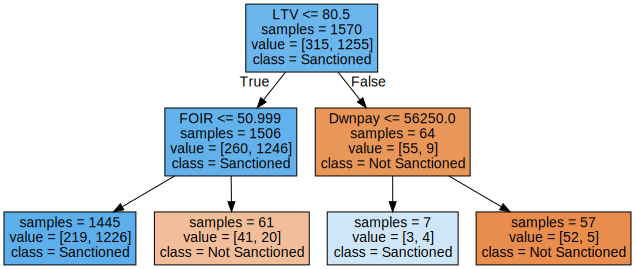

In [34]:
display(GetDecisionTreeGraphViz(dt))

## CART Regression Feature Importance

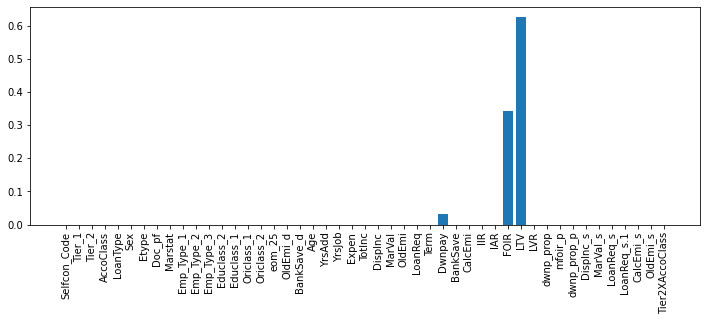

In [35]:
plt.figure(figsize=[12, 4])
plt.bar(features, dt.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Computing predictions

And let's compute the predicted values using this model.

In [36]:
predicted_train = dt.predict(df_train[features])
predicted_test = dt.predict(df_test[features])

## Confusion matrices, sensitivity, and specificity

Let's compute the confusion matrix for the test data.

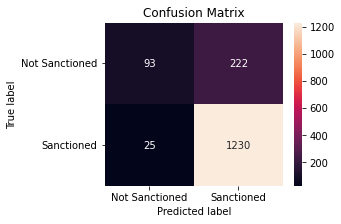

In [37]:
cm_train = sklearn.metrics.confusion_matrix(df_train[target], predicted_train)
DrawConfusionMatrix(cm_train)

In [38]:
SensitivityAndSpecificity(cm_train)

{'Sensitivity': 0.9800796812749004, 'Specificity': 0.29523809523809524}

And also on the test data.

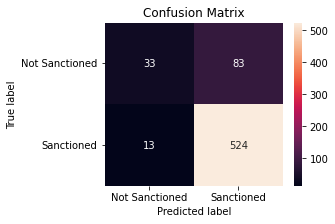

In [39]:
cm_test = sklearn.metrics.confusion_matrix(df_test[target], predicted_test)
DrawConfusionMatrix(cm_test)

In [40]:
SensitivityAndSpecificity(cm_test)

{'Sensitivity': 0.9757914338919925, 'Specificity': 0.28448275862068967}

# Other Hyperparameters

## Maximum samples per leaf

In this example, we specify the minimum samples per leaf that is permitted.

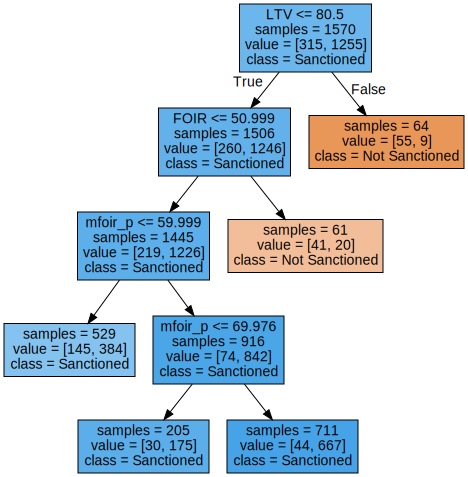

In [41]:
dt = sklearn.tree.DecisionTreeClassifier(random_state=21, min_samples_split=750)
dt.fit(df_train[features], df_train[target])
display(GetDecisionTreeGraphViz(dt))

### Cross-validation to find the best value



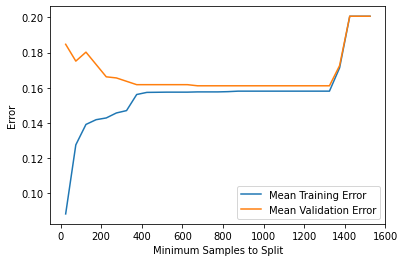

In [42]:
# We'll test minimum sample splits of a range of values
min_sample_splits = np.arange(25, len(df_train), 50)
n_min_sample_splits = len(min_sample_splits)

# And we'll be doing 10-fold cross-validation.
n_folds = 10

# We'll be doing a fit for each of the n_min_sample_splits depths, for each of
# the n_folds folds. Allocate space for the results of each of these results.
train_errors = np.zeros([n_min_sample_splits, n_folds])
valid_errors = np.zeros([n_min_sample_splits, n_folds])

# We'll use fold_index to keep track of which fold we're on, so we know which
# entry to save it in.
fold_index = 0

# Iterate over every training/validation split
kf_xval = sklearn.model_selection.KFold(
    n_splits=n_folds, shuffle=True, random_state=7)
for fold_train_index, fold_valid_index in kf_xval.split(df_train[features]):
  # Get the fold's training and validation data from the indices.
  fold_train = df_train.loc[fold_train_index]
  fold_valid = df_train.loc[fold_valid_index]

  # Iterate over every value in min_sample_splits
  for min_sample_splits_index in range(n_min_sample_splits):
    dt = sklearn.tree.DecisionTreeClassifier(
        min_samples_split=min_sample_splits[min_sample_splits_index],
        random_state=7)
    dt.fit(fold_train[features], fold_train[target])

    # Compute the error for the training and validation folds as 1 minus the
    # score.
    train_errors[min_sample_splits_index, fold_index] = \
        1 - dt.score(fold_train[features], fold_train[target])
    valid_errors[min_sample_splits_index, fold_index] = \
        1 - dt.score(fold_valid[features], fold_valid[target])

  # Increment the index for the fold we're on.
  fold_index += 1

# Now let's get the mean training and validation error across all folds
mean_train_error = np.mean(train_errors,1)
mean_valid_error = np.mean(valid_errors,1)
  
# And let's plot them!
plt.plot(min_sample_splits, mean_train_error, label='Mean Training Error')
plt.plot(min_sample_splits, mean_valid_error, label='Mean Validation Error')
plt.xlabel('Minimum Samples to Split')
plt.ylabel('Error')
plt.legend()
plt.show()

## Minimum impurity decrease

Recall that, by default, we are splitting each node to minimize the resulting gini impurity. One stopping criterion is how much we will be reducing the impurity at each split.

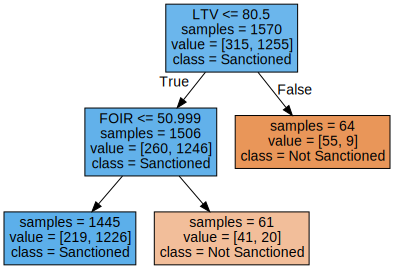

In [43]:
dt = sklearn.tree.DecisionTreeClassifier(random_state=21,
                                         min_impurity_decrease=0.02)
dt.fit(df_train[features], df_train[target])
display(GetDecisionTreeGraphViz(dt))

### Cross-validation to find the best value

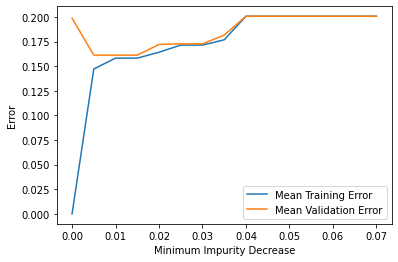

In [44]:
# We'll test minimum impurity decreases of a range of values.
min_impure_decs = np.arange(0, 0.075, 0.005)
n_min_impure_decs = len(min_impure_decs)

# And we'll be doing 10-fold cross-validation.
n_folds = 10

# We'll be doing a fit for each of the n_min_impure_decs depths, for each of
# the n_folds folds. Allocate space for the results of each of these results.
train_errors = np.zeros([n_min_impure_decs, n_folds])
valid_errors = np.zeros([n_min_impure_decs, n_folds])

# We'll use fold_index to keep track of which fold we're on, so we know which
# entry to save it in.
fold_index = 0

# Iterate over every training/validation split
kf_xval = sklearn.model_selection.KFold(
    n_splits=n_folds, shuffle=True, random_state=7)
for fold_train_index, fold_valid_index in kf_xval.split(df_train[features]):
  # Get the fold's training and validation data from the indices.
  fold_train = df_train.loc[fold_train_index]
  fold_valid = df_train.loc[fold_valid_index]

  # Iterate over every value in min_impure_decs
  for min_impure_decs_index in range(n_min_impure_decs):
    dt = sklearn.tree.DecisionTreeClassifier(
        min_impurity_decrease=min_impure_decs[min_impure_decs_index],
        random_state=21)
    dt.fit(fold_train[features], fold_train[target])

    # Compute the error for the training and validation folds as 1 minus the
    # score.
    train_errors[min_impure_decs_index, fold_index] = \
        1 - dt.score(fold_train[features], fold_train[target])
    valid_errors[min_impure_decs_index, fold_index] = \
        1 - dt.score(fold_valid[features], fold_valid[target])

  # Increment the index for the fold we're on.
  fold_index += 1

# Now let's get the mean training and validation error across all folds
mean_train_error = np.mean(train_errors,1)
mean_valid_error = np.mean(valid_errors,1)
  
# And let's plot them!
plt.plot(min_impure_decs, mean_train_error, label='Mean Training Error')
plt.plot(min_impure_decs, mean_valid_error, label='Mean Validation Error')
plt.xlabel('Minimum Impurity Decrease')
plt.ylabel('Error')
plt.legend()
plt.show()

# Predicting using logistic regression

Let's try using logistic regression on this data. Again we will be predicting ``Decision`` based on a number of features.

## Features for logistic regression

For logistic regression, this case study used the following features.

In [45]:
logreg_features = [
    'Tier_1',
    'Tier_2',
    'AccoClass',
    'LoanType',
    'Sex',
    'Etype',
    'Doc_pf',
    'OldEmi_d',
    'BankSave_d',
    'Age',
    'YrsAdd',
    'YrsJob',
    'DispInc',
    'MarVal',
    'Term',
    'BankSave',
    'CalcEmi_s',
    'dwnp_prop',
    'IAR',
    'LTV',
    'LoanReq',
]

Let's define ``y`` to be the dependent variable that we will fit in this logistic regression, and let's define ``X`` to be the independent variables that we'll use.

Add a constant (the intercept) to the independent variables using the ``add_constant`` function.

In [46]:
y = df_train[target]
X = sm.tools.add_constant(df_train[logreg_features])

## Computing the model and fit using all features

Let's go back to the ``statsmodels.GLM`` generalized linear model to do logistic regression.

This time, instead of specifying a formula in R syntax, we'll just specify the dependent variable (as ``endog``) and indepndent variables (as ``exog``). We'll use the function ``sm.tools.add_constant`` to add an intercept.

In [47]:
logreg_fit = sm.GLM(y, X,
                     family=sm.families.Binomial()).fit()
display(logreg_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Decision   No. Observations:                 1570
Model:                            GLM   Df Residuals:                     1548
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -589.27
Date:                Thu, 23 Mar 2023   Deviance:                       1178.5
Time:                        19:55:23   Pearson chi2:                 3.79e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2227
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2404      1.196      5.216      0.000       3.895       8.585
Tier_1         0.3931      0.182      2.166      0.030       0.037       0.749
Tier_2         0.6801      0.184      3.693      0.000       0.319       1.041
AccoClass      0.6310      0.169      3.735      0.000       0.300       0.962
LoanType       0.7162      0.351      2.042      0.041       0.029       1.404
Sex            0.4159      0.288      1.444      0.149      -0.149       0.981
Etype         -0.2169      0.184     -1.180      0.238      -0.577       0.143
Doc_pf         0.1603      0.196      0.819      0.413      -0.223       0.544
OldEmi_d       0.7007      0.245      2.865      0.004       0.221       1.180
BankSave_d     0.4607      0.335      1.376      0.169      -0.196       1.117
Age           -0.0034      0.011     -0.309      0.757      -0.025       0.018
YrsAdd         0.0030      0.008      0.397      0.691      -0.012       0.018
YrsJob        -0.0053      0.011     -0.468      0.640      -0.028       0.017
DispInc     1.122e-06   7.39e-06      0.152      0.879   -1.34e-05    1.56e-05
MarVal      3.998e-07   3.41e-07      1.173      0.241   -2.68e-07    1.07e-06
Term           0.0016      0.005      0.339      0.735      -0.008       0.011
BankSave    4.926e-06    2.5e-06      1.968      0.049    2.11e-08    9.83e-06
CalcEmi_s     -0.7151      1.387     -0.516      0.606      -3.433       2.003
dwnp_prop     -7.6372      0.797     -9.579      0.000      -9.200      -6.075
IAR            0.0219      0.005      4.348      0.000       0.012       0.032
LTV           -0.0678      0.009     -7.260      0.000      -0.086      -0.049
LoanReq    -9.152e-07   2.28e-06     -0.402      0.687   -5.37e-06    3.54e-06
==============================================================================
"""

## Using the VIF to address multicollinearity

Use the [``variance_inflation_factor``](http://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html) to compute the VIF.

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor    features
0   189.306338       const
1     1.519310      Tier_1
2     1.540540      Tier_2
3     1.319024   AccoClass
4     1.617770    LoanType
5     1.021241         Sex
6     1.550214       Etype
7     1.287219      Doc_pf
8     1.025562    OldEmi_d
9     1.380961  BankSave_d
10    1.440404         Age
11    1.308423      YrsAdd
12    1.521661      YrsJob
13    2.659247     DispInc
14    2.902242      MarVal
15    5.784900        Term
16    1.368715    BankSave
17   52.459048   CalcEmi_s
18    1.386405   dwnp_prop
19    2.092653         IAR
20    2.351368         LTV
21   57.502064     LoanReq

Based on this, let's focus on a subset of the features.

In [49]:
logreg_features = [
    'Tier_1',
    'Tier_2',
    'AccoClass',
    'LoanType',
    'OldEmi_d',
    'BankSave_d',
    'BankSave',
    'CalcEmi_s',
    'dwnp_prop_p',
    'IAR',
    'LTV',
    'Tier2XAccoClass',
]
y = df_train[target]
X = sm.tools.add_constant(df_train[logreg_features])

And now let's compute the model using just these features.

In [50]:
logreg_fit = sm.GLM(y, X,
                     family=sm.families.Binomial()).fit()
display(logreg_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Decision   No. Observations:                 1570
Model:                            GLM   Df Residuals:                     1557
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -591.75
Date:                Thu, 23 Mar 2023   Deviance:                       1183.5
Time:                        19:55:35   Pearson chi2:                 3.56e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2202
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.3699      0.767      8.305      0.000       4.867       7.873
Tier_1              0.4184      0.179      2.331      0.020       0.067       0.770
Tier_2              1.0342      0.242      4.268      0.000       0.559       1.509
AccoClass           0.8272      0.183      4.512      0.000       0.468       1.186
LoanType            0.8804      0.292      3.016      0.003       0.308       1.453
OldEmi_d            0.6990      0.244      2.861      0.004       0.220       1.178
BankSave_d          0.4694      0.339      1.384      0.166      -0.195       1.134
BankSave         5.222e-06   2.62e-06      1.995      0.046    9.18e-08    1.04e-05
CalcEmi_s          -0.8560      0.223     -3.846      0.000      -1.292      -0.420
dwnp_prop_p        -0.0749      0.008     -9.581      0.000      -0.090      -0.060
IAR                 0.0235      0.004      6.598      0.000       0.016       0.030
LTV                -0.0751      0.007    -10.818      0.000      -0.089      -0.061
Tier2XAccoClass    -0.7147      0.327     -2.186      0.029      -1.355      -0.074
===================================================================================
"""

In equation form, this is

\begin{align}
\text{Logit equation}=&
6.3699 +                                 \\&
(0.4184) \times \text{Tier_1}            \\&
(1.0342) \times \text{Tier_2}            \\&
(0.8272) \times \text{AccoClass}         \\&
(0.8804) \times \text{LoanType}          \\&
(0.6990) \times \text{OldEmi_d}          \\&
(0.4694) \times \text{BankSave_d}        \\&
(0.0522) \times \text{BankSave_s}        \\&
(-0.8560)\times \text{CalcEmi_s}         \\&
(-0.0749)\times \text{dwnp_prop_p}       \\&
(0.0235) \times \text{IAR}               \\&
(-0.0751)\times \text{LTV}               \\&
(-0.7147)\times \text{Tier2XAccoClass}   \\&
\end{align}

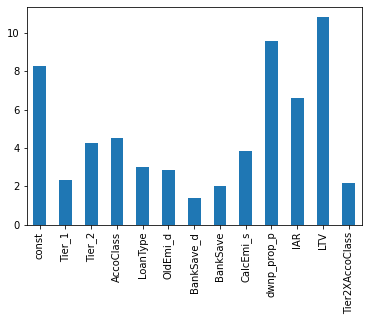

In [51]:
abs(logreg_fit.tvalues).plot.bar()
plt.show()

## Computing Predictions

Let's compute the predicted training and test data using this model, using a cutoff of 0.5

In [52]:
logreg_predicted_train = logreg_fit.predict(
    sm.tools.add_constant(df_train[logreg_features]))
logreg_predicted_test  = logreg_fit.predict(
    sm.tools.add_constant(df_test[logreg_features]))

## Confusion matrices, sensitivity, and specificity

Let's compute the confusion matrix, sensitivity, and specificity for the training set.

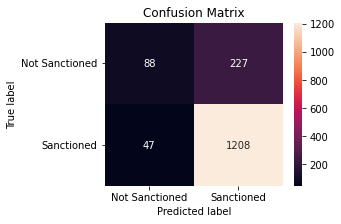

In [53]:
logreg_cm_train = sklearn.metrics.confusion_matrix(
    df_train[target], logreg_predicted_train > 0.5)
DrawConfusionMatrix(logreg_cm_train)

In [54]:
SensitivityAndSpecificity(logreg_cm_train)

{'Sensitivity': 0.9625498007968127, 'Specificity': 0.27936507936507937}

And also for the test set.

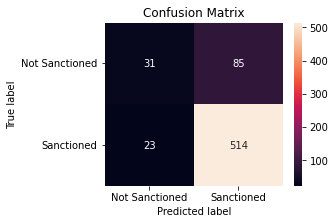

In [55]:
logreg_cm_test = sklearn.metrics.confusion_matrix(
    df_test[target], logreg_predicted_test > 0.5)
DrawConfusionMatrix(logreg_cm_test)

In [56]:
SensitivityAndSpecificity(logreg_cm_test)

{'Sensitivity': 0.957169459962756, 'Specificity': 0.2672413793103448}

# Addressing Label Frequency and Cost by Selecting a Cutoff

The classifier above was trained to maximize the number of correctly classified training data points when the cutoff is set to 0.5.

There are two (untrue!) assumptions built into the model, which we will want to address.

*   Assumption 1: The training data reflects the true underlying rate of the labels.
*   Assumption 2: The cost of any misclassification is the same, regardless of the type of misclassification.

Regarding the first assumption, let's look at the the the distribution of the ``Decision`` property of our training data.


In [57]:
df_train['Decision'].describe()

count    1570.000000
mean        0.799363
std         0.400605
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Decision, dtype: float64

## Computing confusion matrix for all cutoffs

In [58]:
df_cutoffs = pd.DataFrame(columns=['Cutoff', 'TP', 'TN', 'FP', 'FN'])
df_cutoffs

Empty DataFrame
Columns: [Cutoff, TP, TN, FP, FN]
Index: []

In [59]:
for cutoff in np.arange(0.0, 1.01, 0.01):
  # Compute the confusion matrix
  cm = sklearn.metrics.confusion_matrix(
      df_train[target], logreg_predicted_train > cutoff)
  # True positives are in the lower-right (row 1, column 1)
  TP = cm[1, 1]
  # True negatives are in the upper-left (row 0, column 0)
  TN = cm[0, 0]
  # False positives are in the upper-right (row 0, columns 1)
  FP = cm[0, 1]
  # False negatives are in the lower-left (row 1, column 0)
  FN = cm[1, 0]
  new_row_dict = {
      'Cutoff': cutoff,
      'TP': TP,
      'TN': TN,
      'FP': FP,
      'FN': FN,
  }
  df_cutoffs = df_cutoffs.append(new_row_dict, ignore_index=True)
df_cutoffs[::10]

/var/folders/0q/3y5dk4390kqc86qh28v817lw0000gn/T/ipykernel_17400/4250417595.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cutoffs = df_cutoffs.append(new_row_dict, ignore_index=True)
/var/folders/0q/3y5dk4390kqc86qh28v817lw0000gn/T/ipykernel_17400/4250417595.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cutoffs = df_cutoffs.append(new_row_dict, ignore_index=True)
/var/folders/0q/3y5dk4390kqc86qh28v817lw0000gn/T/ipykernel_17400/4250417595.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cutoffs = df_cutoffs.append(new_row_dict, ignore_index=True)
/var/folders/0q/3y5dk4390kqc86qh28v817lw0000gn/T/ipykernel_17400/4250417595.py:20: FutureWarning: The frame.append method is deprecated and will be remove

Cutoff      TP     TN     FP      FN
0      0.0  1255.0    0.0  315.0     0.0
10     0.1  1255.0   22.0  293.0     0.0
20     0.2  1254.0   33.0  282.0     1.0
30     0.3  1245.0   45.0  270.0    10.0
40     0.4  1234.0   63.0  252.0    21.0
50     0.5  1208.0   88.0  227.0    47.0
60     0.6  1160.0  137.0  178.0    95.0
70     0.7  1083.0  189.0  126.0   172.0
80     0.8   915.0  240.0   75.0   340.0
90     0.9   617.0  295.0   20.0   638.0
100    1.0     0.0  315.0    0.0  1255.0

In [60]:
df_cutoffs[::10]

Cutoff      TP     TN     FP      FN
0      0.0  1255.0    0.0  315.0     0.0
10     0.1  1255.0   22.0  293.0     0.0
20     0.2  1254.0   33.0  282.0     1.0
30     0.3  1245.0   45.0  270.0    10.0
40     0.4  1234.0   63.0  252.0    21.0
50     0.5  1208.0   88.0  227.0    47.0
60     0.6  1160.0  137.0  178.0    95.0
70     0.7  1083.0  189.0  126.0   172.0
80     0.8   915.0  240.0   75.0   340.0
90     0.9   617.0  295.0   20.0   638.0
100    1.0     0.0  315.0    0.0  1255.0

## Computing TPR, TNR, FPR, FNR for each cutoff

In [61]:
df_cutoffs['TPR(Sensitivity)'] = \
  df_cutoffs['TP'] / (df_cutoffs['TP'] + df_cutoffs['FN'])
df_cutoffs['TNR(Specificity)'] = \
  df_cutoffs['TN'] / (df_cutoffs['TN'] + df_cutoffs['FP'])

In [62]:
df_cutoffs['FNR'] = 1 - df_cutoffs['TPR(Sensitivity)']
df_cutoffs['FPR'] = 1 - df_cutoffs['TNR(Specificity)']

In [63]:
df_cutoffs[::10]

Cutoff      TP     TN     FP      FN TPR(Sensitivity) TNR(Specificity)  \
0      0.0  1255.0    0.0  315.0     0.0              1.0              0.0   
10     0.1  1255.0   22.0  293.0     0.0              1.0         0.069841   
20     0.2  1254.0   33.0  282.0     1.0         0.999203         0.104762   
30     0.3  1245.0   45.0  270.0    10.0         0.992032         0.142857   
40     0.4  1234.0   63.0  252.0    21.0         0.983267              0.2   
50     0.5  1208.0   88.0  227.0    47.0          0.96255         0.279365   
60     0.6  1160.0  137.0  178.0    95.0         0.924303         0.434921   
70     0.7  1083.0  189.0  126.0   172.0         0.862948              0.6   
80     0.8   915.0  240.0   75.0   340.0         0.729084         0.761905   
90     0.9   617.0  295.0   20.0   638.0         0.491633         0.936508   
100    1.0     0.0  315.0    0.0  1255.0              0.0              1.0   

          FNR       FPR  
0         0.0       1.0  
10        0.0  0.930159  
20   0.000797  0.895238  
30   0.007968  0.857143  
40   0.016733       0.8  
50    0.03745  0.720635  
60   0.075697  0.565079  
70   0.137052       0.4  
80   0.270916  0.238095  
90   0.508367  0.063492  
100       1.0       0.0

## ROC Curve

We've already computed everything we need to draw the ROC curve. We can do this without calling ``sklearn.metrics.roc_curve`` (of note is that if we wanted to compute the AUC, then it would work out better if we used that function).

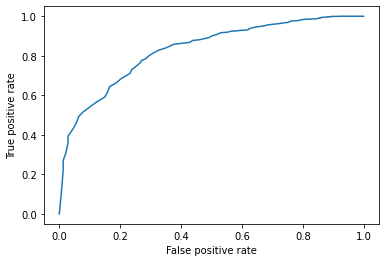

In [64]:
plt.plot(df_cutoffs['FPR'], df_cutoffs['TPR(Sensitivity)'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

## Maximizing Youden's Index

Now let's add a column that computes Youden's Index

In [65]:
df_cutoffs['YoudensIndex'] = \
  df_cutoffs['TPR(Sensitivity)'] + df_cutoffs['TNR(Specificity)'] - 1
df_cutoffs.iloc[::10]

Cutoff      TP     TN     FP      FN TPR(Sensitivity) TNR(Specificity)  \
0      0.0  1255.0    0.0  315.0     0.0              1.0              0.0   
10     0.1  1255.0   22.0  293.0     0.0              1.0         0.069841   
20     0.2  1254.0   33.0  282.0     1.0         0.999203         0.104762   
30     0.3  1245.0   45.0  270.0    10.0         0.992032         0.142857   
40     0.4  1234.0   63.0  252.0    21.0         0.983267              0.2   
50     0.5  1208.0   88.0  227.0    47.0          0.96255         0.279365   
60     0.6  1160.0  137.0  178.0    95.0         0.924303         0.434921   
70     0.7  1083.0  189.0  126.0   172.0         0.862948              0.6   
80     0.8   915.0  240.0   75.0   340.0         0.729084         0.761905   
90     0.9   617.0  295.0   20.0   638.0         0.491633         0.936508   
100    1.0     0.0  315.0    0.0  1255.0              0.0              1.0   

          FNR       FPR YoudensIndex  
0         0.0       1.0          0.0  
10        0.0  0.930159     0.069841  
20   0.000797  0.895238     0.103965  
30   0.007968  0.857143     0.134889  
40   0.016733       0.8     0.183267  
50    0.03745  0.720635     0.241915  
60   0.075697  0.565079     0.359223  
70   0.137052       0.4     0.462948  
80   0.270916  0.238095     0.490988  
90   0.508367  0.063492     0.428141  
100       1.0       0.0          0.0

We can plot a curve of Youden's Index to see where it appears to be maximized.

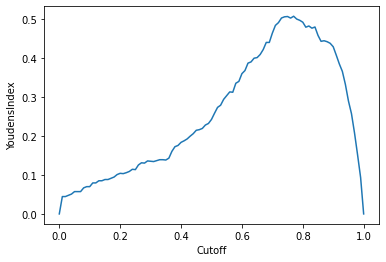

In [66]:
plt.plot(df_cutoffs['Cutoff'], df_cutoffs['YoudensIndex'])
plt.xlabel('Cutoff')
plt.ylabel('YoudensIndex')
plt.show()

Or we can use the [``pandas.Series.idxmax``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.idxmax.html) function to find the row where the value is maximized.

In [67]:
row_max_youdens_index = df_cutoffs['YoudensIndex'].idxmax()
df_cutoffs.iloc[row_max_youdens_index]

TypeError: reduction operation 'argmax' not allowed for this dtype

We can visualize Youden's Index on the ROC curve as follows.

NameError: name 'row_max_youdens_index' is not defined

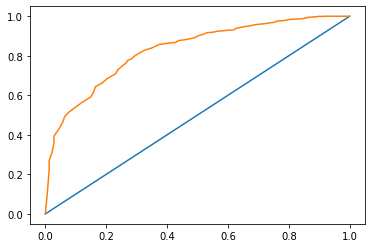

In [68]:
plt.plot(df_cutoffs['FPR'], df_cutoffs['FPR'], label='FPR(1-Specificity)')
plt.plot(df_cutoffs['FPR'], df_cutoffs['TPR(Sensitivity)'], label='TPR(Sensitivity)')
plt.plot(
    [
        df_cutoffs.at[row_max_youdens_index,  'FPR'],
        df_cutoffs.at[row_max_youdens_index,  'FPR']
    ],
    [
        df_cutoffs.at[row_max_youdens_index,  'FPR'],
        df_cutoffs.at[row_max_youdens_index,  'TPR(Sensitivity)']        
    ],
    label='Youdens\' Index')
plt.xlabel('False positive rate')
plt.legend()
plt.show()



## CODING DOJO: Maximizing Profit

In this section, we address the second assumption above, namely, that all misclassifications are equal. Here we assign a profit or loss to every type of classification (true positive, true negative, false positive, false negative).